### テキストファイルを読み込んでワードクラウドを出力するプログラム

##### 形態素解析

In [10]:
# Mecab + NEologd で形態素解析
import MeCab

# .envファイルからNEologdがあるパスを取得
import os
from dotenv import load_dotenv
load_dotenv()
NEOLOGD_PATH = os.environ['NEOLOGD_PATH']

# -dで参照するディレクトリを指定
mct = MeCab.Tagger('-d' + NEOLOGD_PATH)

# テキストファイルを読み込んで文字列に変換
path_to_text_file = '../twitterAPI/getTweetData/output/'    # テキストファイルまでのパス
text_file_name = 'pekora_poems2.txt'                        # テキストファイルの名前

with open(path_to_text_file+text_file_name, encoding="UTF-8") as f:
    text = f.read()

# 形態素解析
node = mct.parse(text)

# 形態素解析結果を表示
# print(node)

##### 単語リスト（名詞）

In [8]:
# # 正規表現用
# import re

# # 単語ごとに格納するリストを用意
# word_list = []

# # 形態素解析結果を1行ずつ渡して名詞であればword_listに追加
# for line in node.splitlines():
#     word = line.split("\t")[0] # 分割結果の前半部分
#     criteria = line.split("\t")[-1] # 分割結果の後半部分

#     # 形態素解析結果で名詞が先頭にある場合word_listに追加
#     if criteria.split(",")[0] in ["名詞"]:
#         # あ〜んとa~zの1文字または2文字の単語のとき処理をpass
#         if re.search(r'^[あ-ん]{1,2}|^[a-z]{1,2,3}$', word):
#             pass
#         else:
#             word_list.append(word)

# # 単語リストを表示
# # print(word_list)


EOS


##### 単語リスト（全品詞含む）

In [22]:
# 正規表現用
import re

# 単語ごとに格納するリストを用意
word_list = []

# 形態素解析結果を1行ずつ渡して名詞であればword_listに追加
for line in node.splitlines():
    word = line.split("\t")[0] # 分割結果の前半部分
    criteria = line.split("\t")[-1] # 分割結果の後半部分

    # 形態素解析結果をword_listに追加
    # あ〜んとa~zの1文字または2文字の単語のとき処理をpass
    if re.search(r'^[あ-ん]{1,2}|^[a-z]{1,2,3}$', word):
        pass
    else:
        word_list.append(word)

# 単語リストを表示
# print(word_list)


##### 既存のストップワードリストを使用

In [20]:
# slothlibを使ってstop_word_listを作成
import requests

SLOTHLIB_URL = os.environ['SLOTHLIB_URL']
url = SLOTHLIB_URL
r = requests.get(url)
tmp = r.text.split('\r\n')

stop_word_list = []

for i in range(len(tmp)):
    if len(tmp[i]) < 1:
        continue
    stop_word_list.append(tmp[i])

# stop_word_listを表示
# print(stop_word_list)

##### ワードクラウドのフォント設定など

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# フォントを日本語用に変更する必要がある
# mpl.matplotlib_fname()で場所を調べられる
FONT_PATH = os.environ['FONT_PATH']
fpath = FONT_PATH

##### 弾きたい単語は↓で手入力

In [ ]:
# 任意でstop_word_listに単語を追加
stop_word_list += []

##### ワードクラウド出力

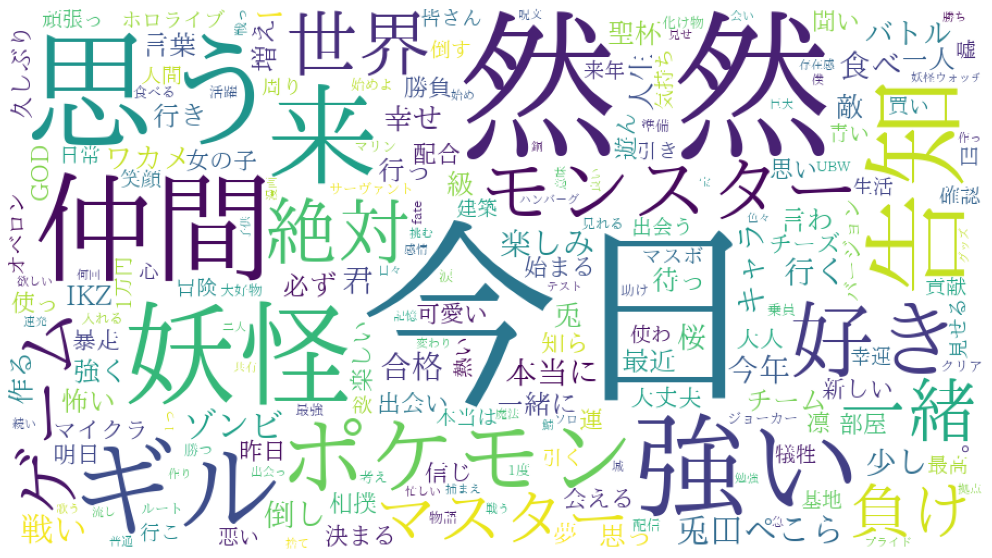

In [21]:

wc = WordCloud(background_color="white",width=900, height=500, font_path=fpath, stopwords=stop_word_list).generate(' '.join(word_list))
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(wc)